In [4]:
import yfinance as yf
import datetime
start = datetime.datetime(2020,9,2)
end = datetime.datetime(2021,7,14)
data = yf.download('MSFT',start=start,end = end, interval="60m")

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/anaconda3/lib/python3.7/threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.7/site-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/anaconda3/lib/python3.7/site-packages/yfinance/multi.py", line 168, in _download_one_threaded
    actions, period, interval, prepost, proxy, rounding)
  File "/anaconda3/lib/python3.7/site-packages/yfinance/multi.py", line 183, in _download_one
    rounding=rounding, many=True)
  File "/anaconda3/lib/python3.7/site-packages/yfinance/base.py", line 157, in history
    data = data.json()
  File "/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/anaconda3/lib/python3.7/site-packages/simplejson/__i

KeyboardInterrupt: 

In [24]:
def MovingAverage(df, window):
    avg = df.Close.rolling(window, min_periods=1).mean()
    return avg

def ExponentialMovingAverage(df, window):
    avg = df.ewm(span=window, adjust=False).mean()
    return avg

In [25]:
MA_50 = MovingAverage(data,50)
MA_200 = MovingAverage(data,200)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

data = yf.download('AAPL','2020-09-02','2021-06-14', interval="60m")
returns = np.log(data['Open']/data['Open'].shift())
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=100).std()*np.sqrt(100)
volatility = volatility.fillna(0)


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


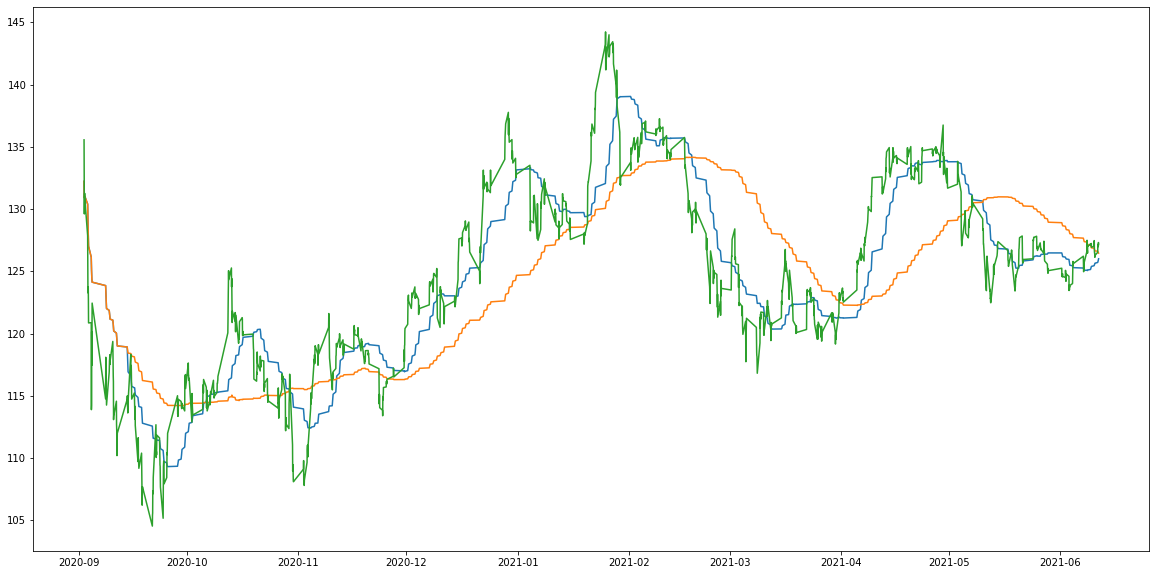

In [31]:
figure(figsize=(20,10))
plt.plot(data.index, MA_50)
plt.plot(data.index, MA_200)
plt.plot(data.index, data.Open)
plt.show()

In [33]:
data['stoploss'] =  data['Open'] - (data['Open'] * volatility)

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


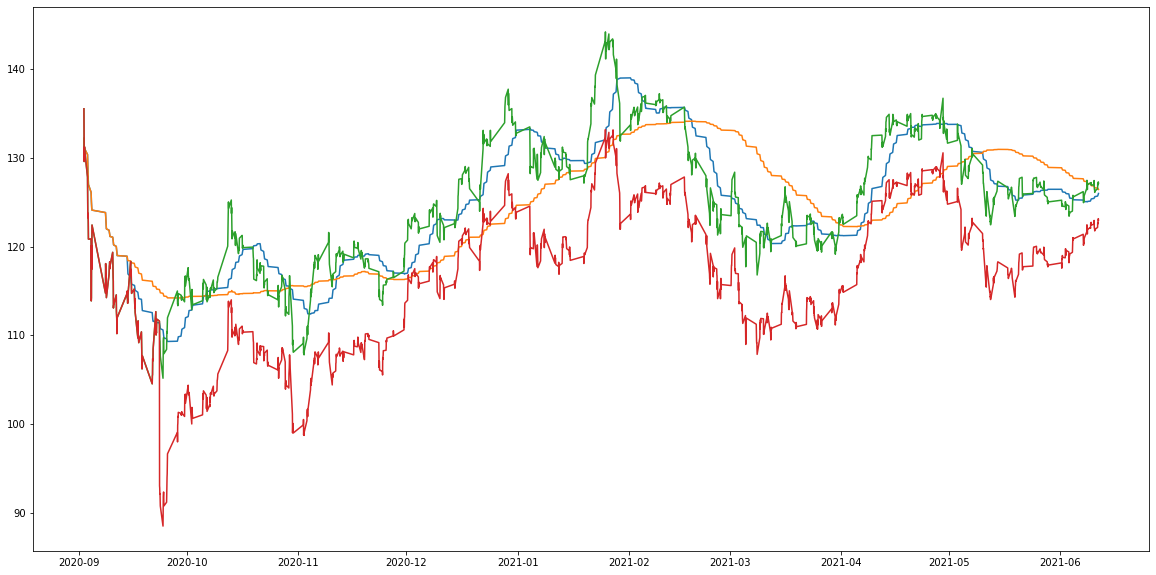

In [34]:
figure(figsize=(20,10))
plt.plot(data.index, MA_50)
plt.plot(data.index, MA_200)
plt.plot(data.index, data.Open)
plt.plot(data.index, data.stoploss)
plt.show()

In [28]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [1]:
from matplotlib.pylab import figure

rsi = computeRSI(data.Open, 14)
rsi = rsi.fillna(50)
rsi = rsi.to_numpy()
rsi = np.insert(rsi, 0, 50, axis=0)

figure(figsize=(30,20))
plt.plot(data.index, MA_50)
plt.plot(data.index, MA_200)
plt.plot(data.index, data.Open)
plt.show()

figure(figsize=(30,20))
plt.plot(data.index, rsi)
plt.show()

NameError: name 'computeRSI' is not defined

In [15]:
rsi.shape

(1358,)

In [29]:
import numpy as np
import math

datetimes = data.index.to_numpy()
prices = data.Open.to_numpy()

ticker = 'AAPL'
returns = 0
log = {}
portfolio = {}

starting_balance = 1000
balance = starting_balance

for i, date in enumerate(datetimes):

    if i > 0:
        
        #if previously the 200 day moving average is greater than the 50 day
        if MA_200[i - 1] > MA_50[i - 1]:

            #if a golden cross occurs
            if MA_50[i] >= MA_200[i]:
                
                #calculate max shares availible
                max_shares = math.floor(balance / prices[i])

                portfolio[ticker] = max_shares
                log[date] = 'Bought for ' + str(prices[i])

                balance = balance - (max_shares * prices[i])

                print(date)
                print('buy')

        #if previously the 50 day moving average is greater than the 200 day
        if MA_50[i - 1] > MA_200[i - 1]:

            #if a death cross occurs
            if MA_200[i] >= MA_50[i]:

                #determine shares to sell (sell all)
                shares_sell = portfolio[ticker]  
                log[date] = 'Sold for ' + str(prices[i])

                #update balance
                balance = balance + (shares_sell * prices[i])

                print(date)
                print('sell')

cumreturns =  -  / starting_balance

8
2020-10-06 09:30:00-04:00
buy
2020-10-29 13:30:00-04:00
sell
0
2020-11-11 15:30:00-05:00
buy
2021-02-18 11:30:00-05:00
sell
0
2021-04-06 13:30:00-04:00
buy
2021-05-10 10:30:00-04:00
sell


In [10]:
returns

12.490005493164062

In [ ]:
import numpy as np
import math
import yfinance as yf

def MovingAverage(df, window):
    avg = df.Open.rolling(window, min_periods=1).mean()
    return avg

def ExponentialMovingAverage(df, window):
    avg = df.Open.ewm(span=window, adjust=False).mean()
    return avg

def backtest(ticker, startdate, enddate, capital, interval = "60m"):

    #get historical data
    data = yf.download(ticker,startdate, enddate, interval= interval)

    #get moving averages, dates, and prices
    MA_50 = MovingAverage(data,50)
    MA_200 = MovingAverage(data,200) 
    datetimes = data.index.to_numpy()
    prices = data.Open.to_numpy()

    #set initial spending balance
    balance = capital

    for i, date in enumerate(datetimes):

        if i > 0:
            
            #if previously the 200 day moving average is greater than the 50 day
            if MA_200[i - 1] > MA_50[i - 1]:

                #if a golden cross occurs
                if MA_50[i] >= MA_200[i]:
                    
                    #calculate max shares availible
                    max_shares = math.floor(balance / prices[i])

                    portfolio[ticker] = max_shares
                    log[date] = 'Bought for ' + str(prices[i])

                    balance = balance - (max_shares * prices[i])

            #if previously the 50 day moving average is greater than the 200 day
            if MA_50[i - 1] > MA_200[i - 1]:

                #if a death cross occurs
                if MA_200[i] >= MA_50[i]:

                    #determine shares to sell (sell all)
                    shares_sell = portfolio[ticker]  
                    log[date] = 'Sold for ' + str(prices[i])

                    #update balance
                    balance = balance + (shares_sell * prices[i])

    cumreturns =  ((balance -  capital) / capital) * 100

    return cumreturns, portfolio, log


returns, portfolio, log = backtest('AAPL','2020-09-02','2021-06-14', 1000, "60m")